# Linear Regression

We consider the simple case of linear regression with an example:

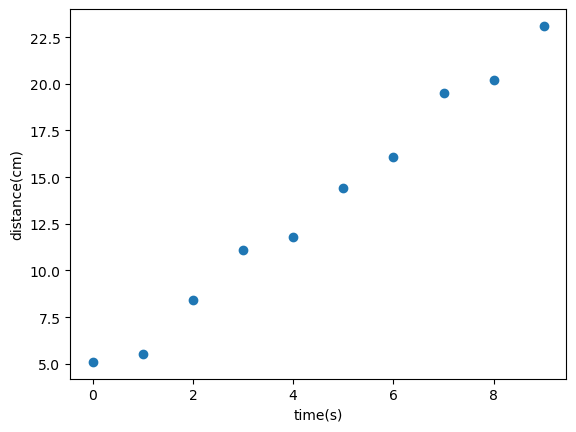

In [1]:
import numpy as np
import matplotlib.pyplot as plt

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
distance = np.array([5.1, 5.5, 8.4, 11.1, 11.8, 14.4, 16.1, 19.5, 20.2, 23.1])

plt.plot(time, distance, 'o')
plt.xlabel("time(s)")
plt.ylabel("distance(cm)");

We want to find a model in the form 

$$ d = v \cdot t + d_0 $$ 

that allows us to predict the position of the object at time $t=12s$ from the data. To do so we will use a brute-force approach trying out a large number of possible combinations of values for $(d_0,v)$ and comparing the prediction of the model with the observed value using the square Euclidean distance between the prediction of the model $D_i^m$ and the observation $D^o_i$: 

$$ \sum_{i=1}^{10} (D^m_i(d_o,v, x_i) - D_i^o )^2. $$

Notice that in this example we are ignoring the uncertainty associated to each measurement. This allows us to use the square of the Euclidean distance (why?). 

In [2]:
slopes = np.linspace(1,3,101)
intercepts = np.linspace(4,6,101)
x = time
y = distance

In [3]:
def model(x, m, b):
    return m*x+b

def se(m, b, x, y):
    return np.sum(((model(x, m ,b) - y)**2 ))

In [4]:
square_errs = np.array([ [ se(m, b, x, y) for b in intercepts ] for m in slopes])

In [5]:
idx = np.unravel_index(square_errs.argmin(), square_errs.shape)

In [6]:
bestm, bestb = slopes[idx[0]],intercepts[idx[1]]

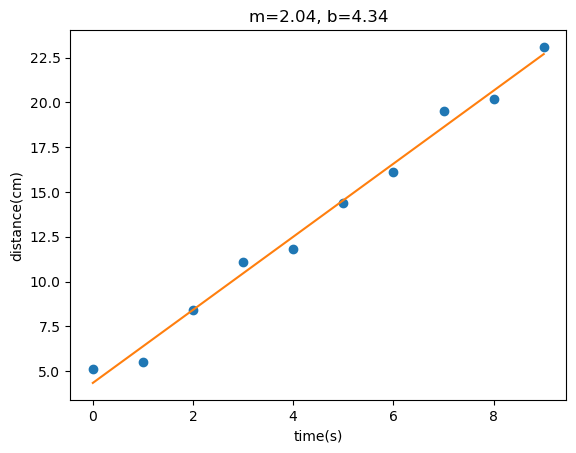

In [7]:
plt.plot(time, distance, 'o')

plt.plot(time, model(time, bestm, bestb),'-')

plt.xlabel("time(s)")
plt.ylabel("distance(cm)");
plt.title('m={0}, b={1}'.format(bestm, bestb));